# a binary classification example
* 做電影分類好壞(二分類法)
    * 具有 50K 電影評論的 IMDB 數據集，用於自然語言處理或文本分析。這是一個用於二元情感分類的數據集，包含比以前的基準數據集多得多的數據。我們提供了一組 25,000 條高度極端的電影評論用於訓練，25,000 條用於測試。因此，使用分類或深度學習算法預測正面和負面評論的數量。
[kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)
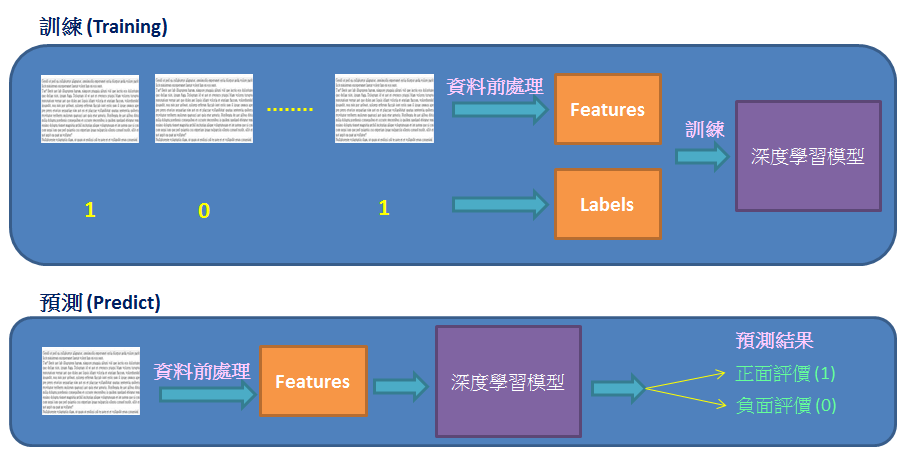
[參考1](http://puremonkey2010.blogspot.com/2017/09/toolkit-keras-imdb.html)  
[參考2(重要)](https://notebook.community/samejack/blog-content/keras-ml/keras-imdb-reviews)
----
> 未來自己想切字詞:
> [**連結**](https://ithelp.ithome.com.tw/articles/10289649)




In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)#簡單的匯入資料一萬筆常用用字

In [ ]:
train_labels.shape#代表有二萬五筆訓練集資料

(25000,)

In [ ]:
print(train_data[0])#第一筆資料
train_labels[0]#正面1還是負面0

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


1

In [ ]:
max([max(sequence) for sequence in train_data])#因為0-9999共一萬字詞

9999

In [ ]:
#from itertools import islice
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
dict(list(word_index.items())[:3])#數字所代表的字詞

{'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007}

## 也可以透過字典檔，將資料組合回評論文字。

In [ ]:
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3幫助我們補長度不足的問題
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 處理資料
* 我們無法將代表字典檔索引位置的整數資料直接送進網路進行訓練，因此需要對資料進行轉換。由於我們只採用前 10000 常用字詞作為資料集，因此輸入資料可以轉換為 10000 維度的 one-hot-encode，例如 [3, 18] 表示一個全部都是 0 的陣列，只有 index 3, 18 是 1。我們會將這樣的資料格式作為張量進行訓練，轉換如下：

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train #0 1向量的矩陣 就類似以前大怡如大王以前所教的dummy variable的形式

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
x_train.shape#所以型態就會是25000筆資料和10000的特徵feature(變數)

(25000, 10000)

In [ ]:
x_test#同理

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

### enumerate 詳細
* enumerate() 函數用於將一個可遍歷的數據對象(如列表、元組或字符串)組合為一個索引序列，同時列出數據和數據下標，一般用在for 循環當中。

Python 2.3. 以上版本可用，2.6 添加start 參數。
```python
enumerate ( sequence , [ start = 0 ]) 
```
sequence -- 一個序列、迭代器或其他支持迭代對象。  
start -- 下標起始位置的值。  
> [連結1](https://www.runoob.com/python/python-func-enumerate.html)  
 [連結2](http://yhhuang1966.blogspot.com/2021/11/python-enumerate.html)  
 [連結dict1](https://blog.csdn.net/fwj_ntu/article/details/106193686)  
 [連結dict2比較好](https://www.tutorialspoint.com/How-to-create-Python-dictionary-by-enumerate-function)
 

In [ ]:
seasons = [ 'Spring' , 'Summer' , 'Fall' , 'Winter' ]
list ( enumerate ( seasons ) )

[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]

In [ ]:
list ( enumerate ( seasons ,start= 1 ) )       # 下標從1 開始

[(1, 'Spring'), (2, 'Summer'), (3, 'Fall'), (4, 'Winter')]

In [ ]:
#老師的一個小範例 自動給定排序 的for 循環
seq = ['one', 'two', 'three']
for i, element in enumerate(seq):
   print(i,element)

0 one
1 two
2 three


## 繼續資料清理
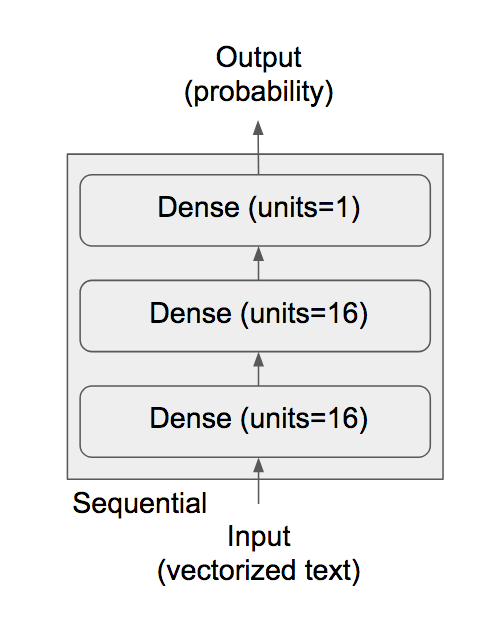
* 超級重要**老師強調**(前面已經用softmax)   
 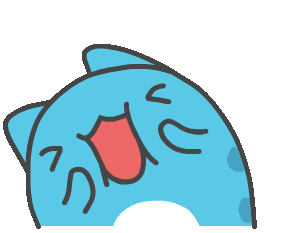
* Activation Functions

| 🐣function | ✔解釋 | 
| :-----: | ----: | 
| softmax | 值介於 [0,1] 之間，且機率總和等於 1，適合多分類使用。 | 
| sigmoid | 值介於 [0,1] 之間，且分布兩極化，大部分不是 0，就是 1，適合二分法。 | 
|Relu (Rectified Linear Units)|忽略負值，介於 [0,∞] 之間。|
|tanh|與sigmoid類似，但值介於[-1,1]之間，即傳導有負值。|

> [Activation Functions參考](https://ithelp.ithome.com.tw/articles/10191725)  
> [Keras的優化器 Optimizer1](https://ithelp.ithome.com.tw/articles/10304509)  
> [Keras的優化器 Optimizer1](https://ithelp.ithome.com.tw/articles/10226886)

### Keras的優化器 Optimizer
* GradientDescentOptimizer
  * 需要用到全部的樣本，速度比較慢，但是叠代到一定次數最終能夠找到最優解，GDO 有個別名 SGD

  ```python
tf.train.GradientDescentOptimizer.__init__(learning_rate,
use_locking=False, name='GrandientDescent')
# learning_rate：學習率
# use_locking：用鎖
# name：名字
  ```


* AdagradOptimizer
* AdagradDAOptimizer
* MomentumOptimizer
  * MomentumOptimizer 利用了上一次的調整量，因為它考慮了過去的值的影響，有點像物理學中的小球運動會受到之前動量的影響，所以被稱為Momentum(動量)優化器。如果上一次梯度顯示是正方向，這次也是正方向，那麽這次的調整量將加上一定的幅度。如果上次和這次的梯度方向相反，則削減變動幅度，使之更加平穩和快速的往最小點移動。MomentumOptimizer 的構造函數如下：

```python
  tf.train.MomentumOptimizer.__init__(learning_rate, momentum,
use_locking=False, name='Momentum', use_nesterov=False)

# momentum: 動量，可以是一個張量，也可以是一個浮點數值
```

* AdamOptimizer
  * AdamOptimizer 結合了 MomentumOptimizer 和 RMSPropOptimize，利用梯度的一階矩估計和二階矩估計動態調整每個參數的學習率。它對學習率有個約束，使得每一次學習率都有個確定範圍，因此參數比較平穩。構造函數如下：

```python
tf.train.AdamOptimizer.__init__(learning_rate=0.001, beta1=0.9,
beta2=0.999, epsilon=1e-08, use_locking=False, name='Adam')
# beta1,beta2：對第一和第二動量估計的指數衰減率，可以是張量，也可是是浮點數值。
# epsilon：非常小的常量。
```
* FtrlOptimizer
* RMSPropOptimize
  * RMprop由Geoffrey Hinton所提出，其目的為解決遞迴神經網路 (Recurrent neural network) 梯度消失與梯度爆炸之問題，因此也較常與用於RNN。學習率也會動態地調整，不同的是梯度需除以開根號的移動平均平方梯度。


```python
## RMSprop
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
var1 = tf.Variable(1.0)
loss = lambda: (var1 ** 2)
step_count = opt.minimize(loss, [var1]).numpy()
var1.numpy()
```



In [ ]:
x_train[0]#測試轉vector

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')#轉為浮點數的原因是後面會用到機率
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model#建置網路架構

* Sigmoid function  
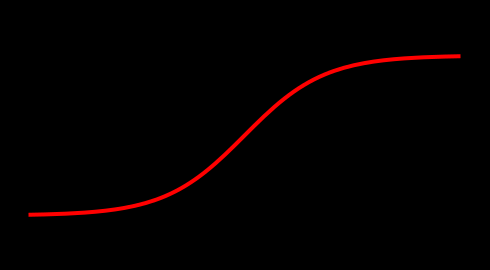
> [參考1](https://ithelp.ithome.com.tw/articles/10189085)  
> [參考1](https://ithelp.ithome.com.tw/articles/10191528)  
> [說明書](https://keras.io/api/layers/activations/)



In [ ]:
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))#有點像是smooth 的邏輯斯迴歸

### Keras.metrics中總共給出了6種accuracy
* accuracy  
該accuracy就是大家熟知的最樸素的accuracy。比如我們有6個樣本，其真實標籤y_true為[0, 1, 3, 3, 4, 2]，但被一個模型預測為了[0, 1, 3, 4, 4, 4]，即y_pred=[0, 1, 3, 4, 4, 4]，那麼該模型的accuracy=4/6=66.67%。

* binary_accuracy  
binary_accuracy和accuracy最大的不同就是，它適用於2分類的情況。從上圖中可以看到binary_accuracy的計算除了y_true和y_pred外，還有一個threshold參數，該參數默認為0.5。比如有6個樣本，其y_true為[0, 0, 0, 1, 1, 0]，y_pred為[0.2, 0.3, 0.6, 0.7, 0.8, 0.1]，那麼其binary_accuracy=5/6=87.5%。具體計算方法為：1）將y_pred中的每個預測值和threshold對比，大於threshold的設為1，小於等於threshold的設為0，得到y_pred_new=[0, 0, 1, 1, 1, 0]；2）將y_true和y_pred_new代入到2.1中計算得到最終的binary_accuracy=87.5%。

* categorical_accuracy  
categorical_accuracy和accuracy也很像。不同的是accuracy針對的是y_true和y_pred都為具體標籤的情況，而categorical_accuracy針對的是y_true為onehot標籤，y_pred為向量的情況。比如有4個樣本，其y_true為[[0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0]]，y_pred為[[0.1, 0.6, 0.3], [0.2, 0.7, 0.1], [0.3, 0.6, 0.1], [0.9, 0, 0.1]]，則其categorical_accuracy為75%。具體計算方法為：1）將y_true轉為非onehot的形式，即y_true_new=[2, 1, 1, 0]；2）根據y_pred中的每個樣本預測的分數得到y_pred_new=[1, 1, 1, 0]；3）將y_true_new和y_pred_new代入到2.1中計算得到最終的categorical_accuracy=75%。

* sparse_categorical_accuracy  
和categorical_accuracy功能一樣，只是其y_true為非onehot的形式。比如有4個樣本，其y_true為[2， 1， 1， 0]，y_pred為[[0.1, 0.6, 0.3], [0.2, 0.7, 0.1], [0.3, 0.6, 0.1], [0.9, 0, 0.1]]，則其categorical_accuracy為75%。具體計算方法為：1）根據y_pred中的每個樣本預測的分數得到y_pred_new=[1, 1, 1, 0]；2）將y_true和y_pred_new代入到2.1中計算得到最終的categorical_accuracy=75%。

* top_k_categorical_accuracy  
在categorical_accuracy的基礎上加上top_k。categorical_accuracy要求樣本在真值類別上的預測分數是在所有類別上預測分數的最大值，才算預測對，而top_k_categorical_accuracy只要求樣本在真值類別上的預測分數排在其在所有類別上的預測分數的前k名就行。比如有4個樣本，其y_true為[[0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0]]，y_pred為[[0.3, 0.6, 0.1], [0.5, 0.4, 0.1], [0.3, 0.6, 0.1], [0.9, 0, 0.1]]，根據前面知識我們可以計算得到其categorical_accuracy=50%，但是其top_k_categorical_accuracy是多少呢？答案跟k息息相關。如果k大於或等於3，其top_k_categorical_accuracy毫無疑問是100%，因為總共就3個類別。如果k小於3，那就要計算了，比如k=2，那麼top_k_categorical_accuracy=75%。具體計算方法為：1）將y_true轉為非onehot的形式，即y_true_new=[2, 1, 1, 0]；2）計算y_pred的top_k的label，比如k=2時，y_pred_new = [[0, 1], [0, 1], [0, 1], [0, 2]]；3）根據每個樣本的真實標籤是否在預測標籤的top_k內來統計準確率，上述4個樣本為例，2不在[0, 1]內，1在[0, 1]內，1在[0, 1]內，0在[0, 2]內，4個樣本總共預測對了3個，因此k=2時top_k_categorical_accuracy=75%。說明一下，Keras中計算top_k_categorical_accuracy時默認的k值為5。

* sparse_top_k_categorical_accuracy
和top_k_categorical_accuracy功能一樣，只是其y_true為非onehot的形式。比如有4個樣本，其y_true為[2， 1， 1， 0]，y_pred為[[0.3, 0.6, 0.1], [0.5, 0.4, 0.1], [0.3, 0.6, 0.1], [0.9, 0, 0.1]]。計算sparse_top_k_categorical_accuracy的步驟如下：1）計算y_pred的top_k的label，比如k=2時，y_pred_new = [[0, 1], [0, 1], [0, 1], [0, 2]]；2）根據每個樣本的真實標籤是否在預測標籤的top_k內來統計準確率，上述4個樣本為例，2不在[0, 1]內，1在[0, 1]內，1在[0, 1]內，0在[0, 2]內，4個樣本總共預測對了3個，因此k=2時top_k_categorical_accuracy=75%。

**總結**  
綜上，keras中的accuracy metric用法很多，大家可以根據自己的實際情況選擇合適的accuracy metric。以下是幾個比較常見的用法：

* 當你的標籤和預測值都是具體的label index（ 如y_true=[1, 2, 1], y_pred=[0, 1, 1]）時，用keras.metrics.accuracy。

* 當你的標籤是具體的label index，而prediction是向量形式（如y_true=[1, 2, 1], y_pred=[[0.2, 0.3, 0.5], [0.9, 0.1, 0], [0, 0.4, 0.6]]）時，用keras.metrics.sparse_categorical_accuracy。

* 當你的標籤是onehot形式，而prediction是向量形式（如y_true=[[0, 1, 0], [0, 0, 1], [0, 1, 0]], y_pred=[[0.2, 0.3, 0.5], [0.9, 0.1, 0], [0, 0.4, 0.6]]）時，用keras.metrics.categorical_accuracy。
> [說明書](https://keras.io/api/metrics/accuracy_metrics/)  
> [參考](https://blog.csdn.net/ghedhrjeerdjh/article/details/114962960)  

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])#因為是0 1二元(陽、陰)損失函數就用binary_crossentropy
#https://dotblogs.com.tw/greengem/2017/12/17/094023
#https://ithelp.ithome.com.tw/articles/10297728

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
           loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## 訓練模型
先將準備訓練的 25000 筆資料集，抽出 10000 筆資料集用在訓練時期的驗證資料，好讓我們監控訓練過程的準確性變化。如下：

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))#交叉驗證

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5335 - acc: 0.7547 - val_loss: 0.3904 - val_acc: 0.8695
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3175 - acc: 0.8947 - val_loss: 0.3281 - val_acc: 0.8690
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2352 - acc: 0.9214 - val_loss: 0.2881 - val_acc: 0.8849
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1921 - acc: 0.9354 - val_loss: 0.3110 - val_acc: 0.8748
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1595 - acc: 0.9482 - val_loss: 0.2941 - val_acc: 0.8831
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1362 - acc: 0.9561 - val_loss: 0.3106 - val_acc: 0.8799
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1161 - acc: 0.9643 - val_loss: 0.2953 - val_acc: 0.8862
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1010 - a

In [ ]:
#訓練的過程會把相關資訊存放在 history，透過事後分析訓練過程的資訊可以幫助我們優化參數。
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

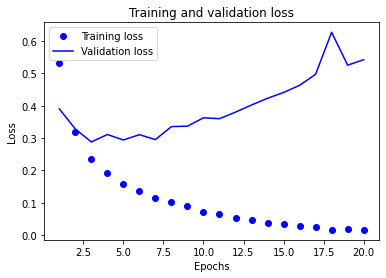

In [ ]:
#透過上面的方法可以取得訓練 History 包含的資訊，然後我們將資訊繪製成為圖表，如下：
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
import pandas as pd 
from natsort import index_natsorted

df = pd.DataFrame.from_dict(history_dict)
df.sort_values(

   by="acc", ascending=False,

   key=lambda x: np.argsort(index_natsorted(df["acc"]))

)

,loss,acc,val_loss,val_acc
17,0.016111,0.998667,0.627223,0.8502
19,0.016711,0.996800,0.542415,0.8707
18,0.019663,0.996800,0.525374,0.8717
16,0.026275,0.995667,0.497184,0.8685
15,0.028039,0.994667,0.463111,0.8744
14,0.032927,0.994067,0.440964,0.8746
13,0.038716,0.992400,0.423015,0.8745
12,0.047290,0.989667,0.402278,0.8761
11,0.051738,0.987867,0.380199,0.8777
9,0.071544,0.982467,0.362685,0.8772


In [ ]:
history_dict.items()

dict_items([('loss', [0.5335150361061096, 0.3174721300601959, 0.2352176457643509, 0.19210019707679749, 0.15946857631206512, 0.13618668913841248, 0.11609084159135818, 0.1010151207447052, 0.08921587467193604, 0.07154438644647598, 0.06582153588533401, 0.051738083362579346, 0.04729006066918373, 0.03871585801243782, 0.03292711079120636, 0.02803914248943329, 0.026274608448147774, 0.016111167147755623, 0.019663140177726746, 0.01671084202826023]), ('acc', [0.7547333240509033, 0.8947333097457886, 0.9214000105857849, 0.9354000091552734, 0.948199987411499, 0.9560666680335999, 0.9642666578292847, 0.9688666462898254, 0.9727333188056946, 0.9824666380882263, 0.9818000197410583, 0.9878666400909424, 0.9896666407585144, 0.9923999905586243, 0.9940666556358337, 0.9946666955947876, 0.9956666827201843, 0.9986666440963745, 0.9968000054359436, 0.9968000054359436]), ('val_loss', [0.39037713408470154, 0.32810482382774353, 0.2880899906158447, 0.3110330402851105, 0.2941415011882782, 0.3105565905570984, 0.29531294

In [ ]:
max_value = history_dict.get("acc")
max(max_value)

0.9986666440963745

## Listing 3.10. Plotting the training and validation accuracy

In [ ]:
history_dict.keys()##怪怪的

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

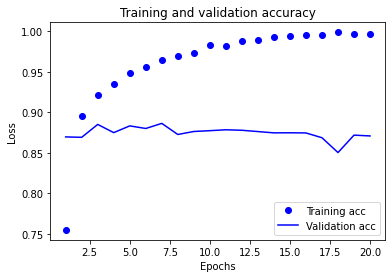

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)#第三個的精準性就很高0.9313

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4712 - accuracy: 0.8129
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2810 - accuracy: 0.9036
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2200 - accuracy: 0.9210
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2859 - accuracy: 0.8852


In [ ]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.18968682],
       [0.99840695],
       [0.7951066 ],
       ...,
       [0.09039617],
       [0.08304785],
       [0.47651267]], dtype=float32)

## 下一個例子

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
  train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
  train_data[0]])

In [ ]:
train_labels[10]

3

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,                    
partial_y_train,
                epochs=20,
                batch_size=512,
                validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 43ms/step - loss: 2.7958 - accuracy: 0.4944 - val_loss: 1.8971 - val_accuracy: 0.6160
Epoch 2/20
16/16 [==============================] - 1s 34ms/step - loss: 1.5613 - accuracy: 0.6794 - val_loss: 1.3760 - val_accuracy: 0.7020
Epoch 3/20
16/16 [==============================] - 1s 32ms/step - loss: 1.1714 - accuracy: 0.7435 - val_loss: 1.1870 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 0s 31ms/step - loss: 0.9518 - accuracy: 0.7930 - val_loss: 1.0688 - val_accuracy: 0.7530
Epoch 5/20
16/16 [==============================] - 1s 32ms/step - loss: 0.7873 - accuracy: 0.8311 - val_loss: 0.9819 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 0s 31ms/step - loss: 0.6565 - accuracy: 0.8592 - val_loss: 0.9331 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 32ms/step - loss: 0.5462 - accuracy: 0.8870 - val_loss: 0.8808 - val_accuracy: 0.8170
Epoch 8/20
16

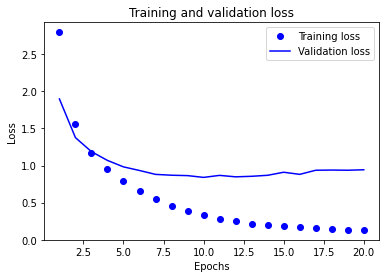

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Listing 3.20. Plotting the training and validation accuracy

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

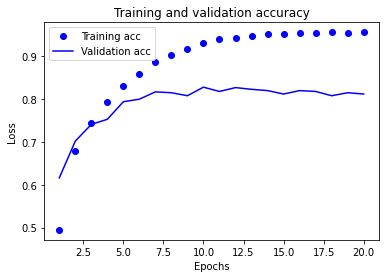

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))

In [ ]:
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/9
16/16 [==============================] - 1s 41ms/step - loss: 2.7179 - accuracy: 0.4959 - val_loss: 1.8060 - val_accuracy: 0.6240
Epoch 2/9
16/16 [==============================] - 1s 32ms/step - loss: 1.5007 - accuracy: 0.6870 - val_loss: 1.3507 - val_accuracy: 0.7010
Epoch 3/9
16/16 [==============================] - 0s 31ms/step - loss: 1.1359 - accuracy: 0.7503 - val_loss: 1.1729 - val_accuracy: 0.7320
Epoch 4/9
16/16 [==============================] - 1s 33ms/step - loss: 0.9268 - accuracy: 0.8001 - val_loss: 1.0841 - val_accuracy: 0.7700
Epoch 5/9
16/16 [==============================] - 1s 32ms/step - loss: 0.7674 - accuracy: 0.8355 - val_loss: 1.0014 - val_accuracy: 0.7880
Epoch 6/9
16/16 [==============================] - 0s 31ms/step - loss: 0.6390 - accuracy: 0.8673 - val_loss: 0.9738 - val_accuracy: 0.7880
Epoch 7/9
16/16 [==============================] - 0s 31ms/step - loss: 0.5324 - accuracy: 0.8900 - val_loss: 0.9059 - val_accuracy: 0.8030
Epoch 8/9
16/16 [===

In [ ]:
results

[0.9381112456321716, 0.7911843061447144]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19100623330365094

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

0.99999994

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))


Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 3.0177 - accuracy: 0.3884 - val_loss: 2.3232 - val_accuracy: 0.3740
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 1.8987 - accuracy: 0.5837 - val_loss: 1.6606 - val_accuracy: 0.6440
Epoch 3/20
63/63 [==============================] - 1s 13ms/step - loss: 1.4090 - accuracy: 0.6794 - val_loss: 1.4464 - val_accuracy: 0.6680
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 1.2210 - accuracy: 0.7031 - val_loss: 1.3792 - val_accuracy: 0.6830
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.1009 - accuracy: 0.7223 - val_loss: 1.3531 - val_accuracy: 0.6860
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 1.0072 - accuracy: 0.7432 - val_loss: 1.3364 - val_accuracy: 0.6950
Epoch 7/20
63/63 [==============================] - 1s 11ms/step - loss: 0.9336 - accuracy: 0.7561 - val_loss: 1.3272 - val_accuracy: 0.6910
Epoch 8/20
63